# A Beginner’s Guide to Carry out Extreme Value Analysis (with Codes in Python)-(1) Basic

## Introduction

Extreme value analysis (EVA) is a process that is used primarily to estimate of the probability of events that are more extreme than any previously observed. It is widely applied in many fields such as engineering, meteorology, hydrology, finance and ocean, etc.

The following presents basic steps to carry out EVA upond a time series data of interest based on open source python packages.   

## 1. Download Data

Download station data from https://www.ncdc.noaa.gov/. 
Here the daily summaries were downloaded using ghcnpy (https://github.com/jjrennie/GHCNpy).

An example is used as demo from the station of Dubai Internatinal Airport.

* Firstly, check stations available in Dubai

In [1]:
import ghcnpy as gp

gp.find_station("Dubai")

('LOOKUP BY STATION NAME: ', 'Dubai')

GRABBING LATEST STATION METADATA FILE
GHCND ID          LAT        LON    ELEV  ST       STATION NAME
###############################################################
('AEM00041194', '  25.2550', '   55.3640', '   10.4', '    ', 'DUBAI INTL                    ')


* Secondly, download data in csv format after finding the target station ID

In [2]:
gp.output_to_csv("AEM00041194")

('\nOUTPUTTING TO CSV: ', 'AEM00041194', '.csv')
('\nGETTING DATA FOR STATION: ', 'AEM00041194')


## 2. Load and Handle Time Series in Pandas

Pandas has dedicated libraries for handling time series(TS) objects, particularly the datatime64[ns] class which stores time information and allows us to perform some operations really fast. Lets start by firing up the required libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

#### load the data set and look at some initial rows and data types of the columns:

In [4]:
data = pd.read_csv('AEM00041194.csv')
print data.tail()
print '\n Data Types:'
print data.dtypes

       YYYY  MM  DD    TMAX    TMIN    PRCP    SNOW    SNWD
12015  2017   8   1    42.7    33.9 -9999.0 -9999.0 -9999.0
12016  2017   8   2    44.5    35.2     0.0 -9999.0 -9999.0
12017  2017   8   3    45.1 -9999.0     0.0 -9999.0 -9999.0
12018  2017   8   4 -9999.0 -9999.0     0.0 -9999.0 -9999.0
12019  2017   8   5    45.0    33.5     0.0 -9999.0 -9999.0

 Data Types:
YYYY      int64
MM        int64
DD        int64
TMAX    float64
TMIN    float64
PRCP    float64
SNOW    float64
SNWD    float64
dtype: object


#### Select annual maxima as extreme values

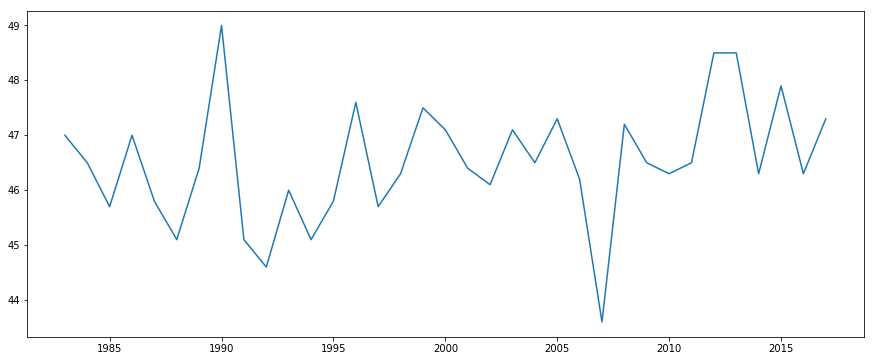

In [5]:
df = data.groupby("YYYY").TMAX.max()
plt.plot(df)

## 3. GEV Analysis

The Python version of L-moments is used to predict optimal parameters for a number of distributions (https://pypi.python.org/pypi/lmoments/). 

Distributions supported are listed below, with their distribution suffix:
* Exponential (EXP)
* Gamma (GAM)
* Generalised Extreme Value (GEV)
* Generalised Logistic (GLO)
* Generalised Normal (GNO)
* Generalised Pareto (GPA)
* Gumbel (GUM)
* Kappa (KAP)
* Normal (NOR)
* Pearson III (PE3)
* Wakeby (WAK)
* Weibull (WEI)
    
lmoments can be installed by
 * conda install lmoments
 * pip install lmoments
 
 
As a demo, only the Generalised Extreme Value (GEV) distribution is used here.

### Import lmoments to carry out GEV analysis

In [14]:
import lmoments

### Calculate moments

In [15]:
LMU = lmoments.samlmu(df)
LMU

[46.508571428571415,
 0.62134453781512811,
 0.0067622396537756931,
 0.21258329849755184,
 -0.033085100307216425]

### Fit GEV distribution

In [16]:
gevfit = lmoments.pelgev(LMU)

### Set some return years, and convert them into probabilities. 
Finally, get extreme values corresponding to these probabilities.

In [17]:
avi  = [2,5,10,20,50,100,200,500,1000];

pavi = np.empty(len(avi))
for i in range(len(avi)):
    pavi[i] = 1.0-1.0 / avi[i]

gevqua = lmoments.quagev(pavi, gevfit)
gevqua

array([ 46.49641764,  47.45904049,  47.95139361,  48.33811984,
        48.73853365,  48.97871385,  49.17673781,  49.38680684,  49.51421913])

### Have a check 
The first one uses a log transformation of returen years.

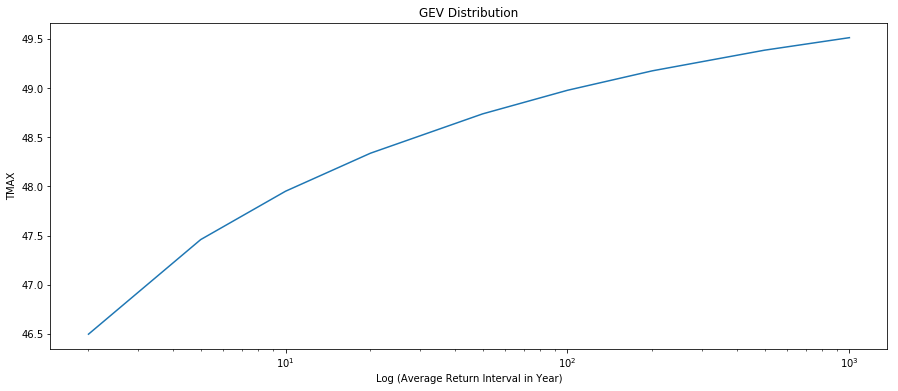

In [18]:
plt.plot(avi,gevqua)
plt.xscale('log')
plt.xlabel('Log (Average Return Interval in Year)')
plt.ylabel('TMAX')
plt.title("GEV Distribution")


The second one used the return years, directly

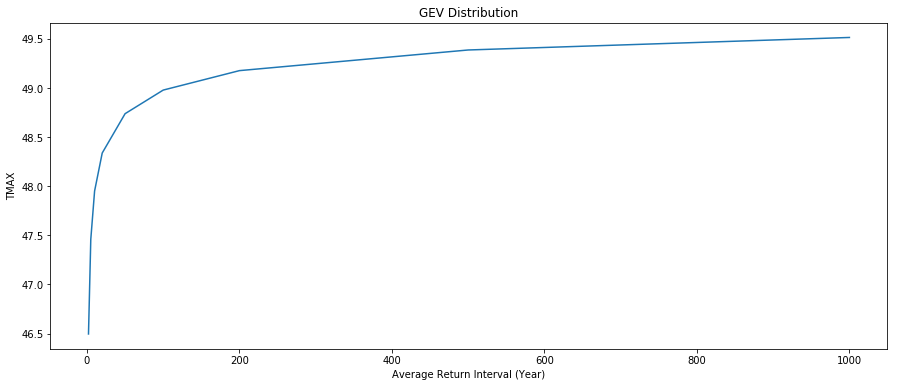

In [13]:
plt.plot(avi,gevqua)

plt.ylabel('TMAX')
plt.xlabel('Average Return Interval (Year)')
plt.ylabel('TMAX')
plt.title("GEV Distribution")

## End Notes

Through this guide I have tried to give you a basic idea how to carry out extreme value analysis (EVA) upon a time series data of interest.

In fact, the analysis will become more complicated in a real practice as high quality data are not always available. Sometimes, you have to spend a lot of time cleaning the data. For example, fill the missing values and check outliers.

In addition, carrying out EVA always fits several distributions, simultaneouly. Then a goodness-of-fit measure (e.g., Anderson-Darling test) is used to select the optimal one.

This is just a start. You can try more.
